In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import pandas as pd

# --- 🔧 Configura la ruta al archivo kaggle.json ---
os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\Betan\OneDrive\Escritorio\Estudios\Masters\Proyectos\Proyecto United\kaggle_api"

# --- 📥 Función para descargar datasets desde Kaggle ---
def descargar_dataset_kaggle(dataset: str, ruta_destino: str) -> str:
    os.makedirs(ruta_destino, exist_ok=True)
    api = KaggleApi()
    api.authenticate()  # Usa la variable de entorno configurada arriba
    api.dataset_download_files(dataset=dataset, path=ruta_destino, unzip=True)
    print(f"✅ Dataset descargado y extraído en: {ruta_destino}")
    return ruta_destino

# --- ⚽ Identificadores en Kaggle ---
dataset_2425 = "hubertsidorowicz/football-players-stats-2024-2025"
dataset_2526 = "hubertsidorowicz/football-players-stats-2025-2026"

# --- 💾 Descargas en carpetas separadas ---
ruta_2425 = descargar_dataset_kaggle(dataset_2425, "data/players_2425")
ruta_2526 = descargar_dataset_kaggle(dataset_2526, "data/players_2526")


Dataset URL: https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2024-2025
✅ Dataset descargado y extraído en: data/players_2425
Dataset URL: https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2025-2026
✅ Dataset descargado y extraído en: data/players_2526


In [5]:
def cargar_datos_jugadores(ruta_csv: str, temporada: str) -> pd.DataFrame:
    df = pd.read_csv(ruta_csv, encoding="utf-8-sig")
    df["Season"] = temporada
    return df

# Rutas de los CSV descargados
ruta_csv_2425 = "data/players_2425/players_data-2024_2025.csv"
ruta_csv_2526 = "data/players_2526/players_data-2025_2026.csv"

# Cargar cada dataset con su temporada
df_2425 = cargar_datos_jugadores(ruta_csv_2425, "2024/25")
df_2526 = cargar_datos_jugadores(ruta_csv_2526, "2025/26")

# Concatenar en un único DataFrame
df_jugadores = pd.concat([df_2425, df_2526], ignore_index=True)

# Vista previa
print(df_jugadores.shape)
df_jugadores.head()


(5096, 268)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Season
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25


In [6]:
# Identificar columnas numéricas (sin imputar todavía)
columnas_numericas = df_jugadores.select_dtypes(include=["number"]).columns

# Vista previa
df_jugadores.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Season
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/25


In [7]:
# Paso 1: Normalizar nombres de ligas y nacionalidades
liga_map = {
    "eng Premier League": "Premier League",
    "es La Liga": "La Liga",
    "de Bundesliga": "Bundesliga",
    "fr Ligue 1": "Ligue 1",
    "it Serie A": "Serie A"
}

# Aplicar reemplazo controlado
df_jugadores["Comp"] = df_jugadores["Comp"].replace(liga_map)

# Mantener solo los últimos 3 caracteres del campo 'Nation'
df_jugadores["Nation"] = df_jugadores["Nation"].astype(str).str[-3:]

# Verificación visual
df_jugadores[["Player", "Nation", "Comp", "Season"]].head(10)


,Player,Nation,Comp,Season
0,Max Aarons,ENG,Premier League,2024/25
1,Max Aarons,ENG,La Liga,2024/25
2,Rodrigo Abajas,ESP,La Liga,2024/25
3,James Abankwah,IRL,Serie A,2024/25
4,Keyliane Abdallah,FRA,Ligue 1,2024/25
5,Yunis Abdelhamid,MAR,Ligue 1,2024/25
6,Himad Abdelli,ALG,Ligue 1,2024/25
7,Mohamed Abdelmoneim,EGY,Ligue 1,2024/25
8,Ali Abdi,TUN,Ligue 1,2024/25
9,Saud Abdulhamid,KSA,Serie A,2024/25


In [8]:
# Paso 2: Clasificación táctica generalizada basada en el primer código de la columna Pos
def clasificar_rol_general(pos):
    if pd.isna(pos):
        return "Otro"
    primera_pos = str(pos).split(",")[0].strip()
    if primera_pos.startswith("GK"):
        return "Portero"
    elif primera_pos.startswith("DF"):
        return "Defensa"
    elif primera_pos.startswith("MF"):
        return "Centrocampista"
    elif primera_pos.startswith("FW"):
        return "Atacante"
    else:
        return "Otro"

# Crear la columna Rol_Tactico directamente desde Pos
df_jugadores["Rol_Tactico"] = df_jugadores["Pos"].apply(clasificar_rol_general)

# Reordenar columna 'Rol_Tactico' justo después de 'Pos'
columnas = df_jugadores.columns.tolist()
columnas.remove("Rol_Tactico")
indice_pos = columnas.index("Pos") + 1
columnas.insert(indice_pos, "Rol_Tactico")

# Aplicar nuevo orden
df_jugadores = df_jugadores[columnas]

# Verificación visual
df_jugadores[["Player", "Pos", "Rol_Tactico", "Comp", "Season"]].head(10)


,Player,Pos,Rol_Tactico,Comp,Season
0,Max Aarons,DF,Defensa,Premier League,2024/25
1,Max Aarons,"DF,MF",Defensa,La Liga,2024/25
2,Rodrigo Abajas,DF,Defensa,La Liga,2024/25
3,James Abankwah,"DF,MF",Defensa,Serie A,2024/25
4,Keyliane Abdallah,FW,Atacante,Ligue 1,2024/25
5,Yunis Abdelhamid,DF,Defensa,Ligue 1,2024/25
6,Himad Abdelli,"MF,FW",Centrocampista,Ligue 1,2024/25
7,Mohamed Abdelmoneim,DF,Defensa,Ligue 1,2024/25
8,Ali Abdi,"DF,MF",Defensa,Ligue 1,2024/25
9,Saud Abdulhamid,DF,Defensa,Serie A,2024/25


In [30]:
# ============================================================
# 🧮 CÁLCULO ROBUSTO DE MÉTRICAS POR 90 MINUTOS (V. CORREGIDA)
# ============================================================

import numpy as np
import pandas as pd
import re

# ---------- Helpers ----------
def normalizar_porcentajes_idempotente(df):
    """
    Quita '%' si existe, convierte a numérico y unifica a 0–100.
    Si ya está en 0–100, no lo toca; si está en 0–1, lo multiplica x100.
    Deja NaN los valores negativos o >100.
    """
    df = df.copy()
    for col in df.columns:
        s = df[col]
        if "%" in col or re.search(r"(pct|rate|ratio|accuracy|perct)", col, re.I) or \
           any(("%" in str(v)) for v in s.dropna().astype(str).head(30).tolist()):
            s2 = s.astype(str).str.replace("%", "", regex=False)
            s2 = pd.to_numeric(s2, errors="coerce")
            if s2.notna().any() and (s2 <= 1.5).mean() > 0.8:
                s2 = s2 * 100.0  # estaba en 0–1
            s2 = s2.mask((s2 < 0) | (s2 > 100))
            df[col] = s2
    return df


def es_porcentaje_o_ratio(nombre):
    """
    Identifica columnas que NO deben recalcularse a per90.
    """
    return bool(re.search(
        r"(pct|rate|ratio|accuracy|perct|percent|success|score|avg|mean|/90|per_90)",
        nombre, re.I
    )) or "%" in nombre


# ---------- 1) Copia del DataFrame original ----------
df_per90 = df_jugadores.copy()

# ---------- 1b) Asegurar minutos ----------
if "Min" not in df_per90.columns:
    if "90s" in df_per90.columns:
        df_per90["Min"] = pd.to_numeric(df_per90["90s"], errors="coerce") * 90
    else:
        raise ValueError("No encuentro 'Min' ni '90s' para calcular minutos.")

df_per90["Min"] = pd.to_numeric(df_per90["Min"], errors="coerce")

# ---------- 2) Normalizar porcentajes antes de cálculos ----------
df_per90 = normalizar_porcentajes_idempotente(df_per90)
print("✅ Porcentajes normalizados (0–100) antes de calcular per-90.")

# ---------- 3) Definir columnas a excluir ----------
columnas_excluir = {
    "Age", "Born", "Min", "90s", "MP", "Starts", "Season", "Rol_Tactico"
}

# Además, excluimos cualquier columna que ya sea ratio o tasa
todas = df_per90.columns.tolist()
excluir_por_naturaleza = {
    c for c in todas
    if es_porcentaje_o_ratio(c) or c.endswith("_per90")
}

columnas_excluir = columnas_excluir.union(excluir_por_naturaleza)

# ---------- 4) Detectar columnas realmente acumulativas ----------
metricas_numericas = []
for c in df_per90.select_dtypes(include="number").columns:
    if c in columnas_excluir:
        continue
    mean_val = df_per90[c].mean(skipna=True)
    if mean_val > 10:  # valores grandes → acumulativos
        metricas_numericas.append(c)

print(f"📊 Se recalcularán {len(metricas_numericas)} métricas como 'per90'.")
if len(metricas_numericas) > 0:
    print("🔹 Ejemplo:", metricas_numericas[:10])

# ---------- 5) Calcular per90 correctamente ----------
df_valid = df_per90[df_per90["Min"] > 0].copy()
df_per90_calc = df_valid[metricas_numericas].div(df_valid["Min"], axis=0) * 90
df_per90_calc.columns = [f"{col}_per90" for col in df_per90_calc.columns]

# Reindexar para mantener filas originales
df_per90_calc = df_per90_calc.reindex(df_per90.index)

# ---------- 6) Concatenar sin sobrescribir columnas existentes ----------
for col in df_per90_calc.columns:
    if col not in df_per90.columns:
        df_per90[col] = df_per90_calc[col]

# ---------- 7) Limpieza de infinitos y control final ----------
df_per90.replace([np.inf, -np.inf], np.nan, inplace=True)

print("✅ Cálculo de métricas per-90 completado (versión corregida).")
df_per90.head(5)


✅ Porcentajes normalizados (0–100) antes de calcular per-90.
📊 Se recalcularán 95 métricas como 'per90'.
🔹 Ejemplo: ['Rk', 'PrgC', 'PrgP', 'PrgR', 'Rk_stats_shooting', 'Born_stats_shooting', 'Sh', 'Dist', 'Rk_stats_passing', 'Born_stats_passing']
✅ Cálculo de métricas per-90 completado (versión corregida).


C:\Users\Betan\AppData\Local\Temp\ipykernel_25796\3666488080.py:94: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Betan\AppData\Local\Temp\ipykernel_25796\3666488080.py:94: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Betan\AppData\Local\Temp\ipykernel_25796\3666488080.py:94: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

,Rk,Player,Nation,Pos,Rol_Tactico,Squad,Comp,Age,Born,MP,...,90s_stats_keeper_adv_per90,GA_stats_keeper_adv_per90,PSxG_per90,Cmp_stats_keeper_adv_per90,Att_stats_keeper_adv_per90,Att (GK)_per90,Thr_per90,Opp_per90,Stp_per90,#OPA_per90
0,1,Max Aarons,ENG,DF,Defensa,Bournemouth,Premier League,24.0,2000.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,ENG,"DF,MF",Defensa,Valencia,La Liga,24.0,2000.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,ESP,DF,Defensa,Valencia,La Liga,21.0,2003.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,IRL,"DF,MF",Defensa,Udinese,Serie A,20.0,2004.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,FRA,FW,Atacante,Marseille,Ligue 1,18.0,2006.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# ============================================================
# 🌍 ESCALADO ROBUSTO GLOBAL (0–100) — COMPARABLE ENTRE TODAS LAS MÉTRICAS
# ============================================================

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

df_final_scaled = df_per90.copy()

# 1️⃣ Columnas candidatas al escalado
cols_to_scale = [c for c in df_final_scaled.columns if c.endswith("_per90")]
cols_percent = [c for c in df_final_scaled.columns if c.endswith("%")]

# 2️⃣ Limpieza básica
df_final_scaled[cols_to_scale] = (
    df_final_scaled[cols_to_scale]
    .apply(pd.to_numeric, errors="coerce")
    .replace([np.inf, -np.inf], np.nan)
)

# 3️⃣ Imputación por mediana
for c in cols_to_scale:
    df_final_scaled[c] = df_final_scaled[c].fillna(df_final_scaled[c].median())

# 4️⃣ Winsorización (recorte controlado a percentiles 1–99)
for c in cols_to_scale:
    low, high = df_final_scaled[c].quantile([0.01, 0.99])
    df_final_scaled[c] = df_final_scaled[c].clip(lower=low, upper=high)

# 5️⃣ Escalado MinMax global (0–100)
scaler = MinMaxScaler(feature_range=(0, 100))
df_final_scaled[cols_to_scale] = scaler.fit_transform(df_final_scaled[cols_to_scale])

# 6️⃣ Reincorporar métricas de porcentaje tal cual (ya en 0–100)
for c in cols_percent:
    if c in df_per90.columns:
        df_final_scaled[c] = pd.to_numeric(df_per90[c], errors="coerce")

print("✅ Escalado robusto global completado — todas las métricas comparables en 0–100.")


✅ Escalado robusto global completado — todas las métricas comparables en 0–100.


In [57]:
existentes_scaled = [m for m in metricas_porteros if m in df_final_scaled.columns]
desc_scaled = df_final_scaled[existentes_scaled].describe(percentiles=[.1,.25,.5,.75,.9]).T
desc_scaled[["min","10%","25%","50%","75%","90%","max"]]


,min,10%,25%,50%,75%,90%,max
Save%,0.0,56.400000,63.550000,69.000000,75.000000,79.340000,100.0
Saves_per90,0.0,48.710568,48.710568,48.710568,48.710568,48.710568,100.0
CS%,0.0,0.000000,10.000000,23.300000,34.200000,50.000000,100.0
Cmp%,0.0,64.300000,71.800000,79.200000,85.700000,89.960000,100.0
Launch%,0.0,18.450000,25.600000,31.850000,41.775000,51.650000,92.3


In [58]:
# ============================================================
# 🎯 SELECCIÓN FINAL DE COLUMNAS ESCALADAS PARA VISUALIZACIÓN
# ============================================================

# 1️⃣ Lista de columnas clave (adaptada a tu app)
columnas_finales_csv = [
    # Identidad
    "Player", "Nation", "Pos", "Rol_Tactico", "Squad", "Comp", "Season",
    "Age", "Born", "MP", "Starts", "Min", "90s",

    # Producción ofensiva y finalización
    "Gls_per90", "xG_per90", "NPxG_per90",
    "Sh_per90", "SoT_per90", "G/SoT_per90",

    # Creatividad e interiores
    "xA_per90", "xAG_per90", "KP_per90", "GCA90_per90", "SCA_per90",
    "1/3_per90", "PPA_per90",

    # Progresión y pase
    "PrgP_per90", "PrgC_per90", "Carries_per90",
    "Cmp%", "Cmp_per90", "TotDist_per90",

    # Defensa y recuperación
    "Tkl+Int_per90", "Int_per90", "Recov_per90", "Blocks_per90", "Clr_per90",

    # Posesión y presión
    "Touches_per90", "Dis_per90", "Pressures_per90", "Err_per90",

    # Portero
    "Save%", "PSxG+/-_per90", "PSxG_per90", "CS%", "Saves_per90", "Launch%",
]

# 2️⃣ Filtrar solo las columnas que existen realmente
columnas_existentes = [col for col in columnas_finales_csv if col in df_final_scaled.columns]

# 3️⃣ Crear DataFrame final escalado
df_final = df_final_scaled[columnas_existentes].copy()

# 4️⃣ Vista previa
print(f"✅ DataFrame final preparado con {len(df_final.columns)} columnas escaladas (0–100).")
df_final.head(10)


✅ DataFrame final preparado con 31 columnas escaladas (0–100).


,Player,Nation,Pos,Rol_Tactico,Squad,Comp,Season,Age,Born,MP,...,TotDist_per90,Tkl+Int_per90,Recov_per90,Clr_per90,Touches_per90,Save%,PSxG_per90,CS%,Saves_per90,Launch%
0,Max Aarons,ENG,DF,Defensa,Bournemouth,Premier League,2024/25,24.0,2000.0,3,...,55.032850,27.906977,48.837209,0.000000,45.794239,NaN,45.189212,NaN,48.710568,NaN
1,Max Aarons,ENG,"DF,MF",Defensa,Valencia,La Liga,2024/25,24.0,2000.0,4,...,30.466703,26.666667,35.000000,20.000000,35.655132,NaN,45.189212,NaN,48.710568,NaN
2,Rodrigo Abajas,ESP,DF,Defensa,Valencia,La Liga,2024/25,21.0,2003.0,1,...,20.771175,49.230769,18.461538,0.000000,24.506956,NaN,45.189212,NaN,48.710568,NaN
3,James Abankwah,IRL,"DF,MF",Defensa,Udinese,Serie A,2024/25,20.0,2004.0,6,...,36.566924,45.454545,47.727273,27.272727,37.841874,NaN,45.189212,NaN,48.710568,NaN
4,Keyliane Abdallah,FRA,FW,Atacante,Marseille,Ligue 1,2024/25,18.0,2006.0,1,...,73.587504,100.000000,0.000000,0.000000,80.756675,NaN,45.189212,NaN,48.710568,NaN
5,Yunis Abdelhamid,MAR,DF,Defensa,Saint-Étienne,Ligue 1,2024/25,36.0,1987.0,16,...,40.555405,24.007744,24.394966,44.143272,29.318504,NaN,45.189212,NaN,48.710568,NaN
6,Himad Abdelli,ALG,"MF,FW",Centrocampista,Angers,Ligue 1,2024/25,24.0,1999.0,32,...,40.104367,20.830401,40.745954,7.881773,35.145187,NaN,45.189212,NaN,48.710568,NaN
7,Mohamed Abdelmoneim,EGY,DF,Defensa,Nice,Ligue 1,2024/25,25.0,1999.0,12,...,51.670697,33.684211,35.087719,52.397661,38.134398,NaN,45.189212,NaN,48.710568,NaN
8,Ali Abdi,TUN,"DF,MF",Defensa,Nice,Ligue 1,2024/25,30.0,1993.0,25,...,29.394523,36.180905,31.012204,21.249103,30.438074,NaN,45.189212,NaN,48.710568,NaN
9,Saud Abdulhamid,KSA,DF,Defensa,Roma,Serie A,2024/25,25.0,1999.0,4,...,45.628443,19.512195,8.780488,0.000000,39.805941,NaN,45.189212,NaN,48.710568,NaN


In [59]:
# ============================================================
# 🔍 CONTROL DE CALIDAD FINAL DE MÉTRICAS (NaN / 0 / datos válidos)
# ============================================================

metricas_con_problemas = []

# Solo analizamos columnas numéricas
columnas_numericas = df_final.select_dtypes(include="number").columns
print(f"🔎 Revisando {len(columnas_numericas)} métricas numéricas...")

for col in columnas_numericas:
    serie = df_final[col]

    if isinstance(serie, pd.Series):
        if pd.isna(serie).sum() == len(serie):
            metricas_con_problemas.append((col, "TODOS son NaN"))
        elif (serie == 0).sum() == len(serie):
            metricas_con_problemas.append((col, "TODOS son 0"))
        elif pd.isna(serie).sum() > 0:
            porcentaje = pd.isna(serie).mean() * 100
            metricas_con_problemas.append((col, f"{porcentaje:.2f}% NaN"))

# Mostrar resultado
if metricas_con_problemas:
    print("⚠️ Revisión de métricas con posibles problemas:")
    for metrica, estado in metricas_con_problemas:
        print(f" - {metrica}: {estado}")
else:
    print("✅ Todas las métricas numéricas en df_final tienen datos válidos.")


🔎 Revisando 24 métricas numéricas...
⚠️ Revisión de métricas con posibles problemas:
 - Age: 0.20% NaN
 - Born: 0.20% NaN
 - Min: 0.02% NaN
 - Cmp%: 0.61% NaN
 - Save%: 93.35% NaN
 - CS%: 93.47% NaN
 - Launch%: 93.21% NaN


In [61]:
# ============================================================
# 🧼 LIMPIEZA FINAL DE CAMPOS DEMOGRÁFICOS Y DE MINUTOS
# ============================================================

# Age y Born → texto legible si faltan valores
for col in ["Age", "Born"]:
    if col in df_final.columns:
        df_final[col] = df_final[col].astype(object)  # fuerza tipo texto
        df_final[col] = df_final[col].where(df_final[col].notna(), "N/A")

# Min → numérico, sin NaN
if "Min" in df_final.columns:
    df_final["Min"] = pd.to_numeric(df_final["Min"], errors="coerce").fillna(0)

print("✅ Limpieza final de columnas Age, Born y Min completada.")


✅ Limpieza final de columnas Age, Born y Min completada.


In [62]:
# ============================================================
# 📊 RADAR CHART COMPARATIVO — ESCALADO GLOBAL (0–100)
# ============================================================

import plotly.graph_objects as go

# --- 1️⃣ Seleccionar métricas relevantes ---
metricas_radar = [
    "Gls_per90", "xG_per90", "NPxG_per90", "xA_per90",
    "KP_per90", "SCA_per90", "GCA90_per90",
    "PrgP_per90", "Carries_per90", "Cmp%", "Touches_per90"
]

# Filtrar solo las que realmente existen
metricas_existentes = [m for m in metricas_radar if m in df_final.columns]

# --- 2️⃣ Elegir jugador de ejemplo ---
jugador = "Kylian Mbappé"  # 🔄 Cambia por uno real de tu dataset
rol = df_final.loc[df_final["Player"] == jugador, "Rol_Tactico"].iloc[0]
print(f"🎯 Jugador: {jugador} | Rol táctico: {rol}")

# --- 3️⃣ Calcular promedio dentro del rol táctico ---
df_rol = df_final[df_final["Rol_Tactico"] == rol]
mean_rol = df_rol[metricas_existentes].mean()

# --- 4️⃣ Extraer valores del jugador ---
valores = df_final.loc[df_final["Player"] == jugador, metricas_existentes].iloc[0].values

# --- 5️⃣ Crear radar comparativo ---
fig = go.Figure()

# Jugador individual
fig.add_trace(go.Scatterpolar(
    r=valores,
    theta=metricas_existentes,
    fill='toself',
    name=jugador,
    line=dict(color="#00C896", width=3)
))

# Media de su rol táctico
fig.add_trace(go.Scatterpolar(
    r=mean_rol.values,
    theta=metricas_existentes,
    fill='toself',
    name=f"Media {rol}",
    line=dict(color="#808080", dash='dot', width=2)
))

# --- 6️⃣ Configuración visual ---
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
    title=f"Radar Escalado por Rol — {jugador} ({rol})",
    showlegend=True,
    template="plotly_dark"
)

fig.show()


🎯 Jugador: Kylian Mbappé | Rol táctico: Atacante


In [65]:
# Comparación solo para columnas numéricas comunes
cols_numericas_final = df_final.select_dtypes(include="number").columns

comparacion = pd.DataFrame({
    "min_antes": df_per90[cols_numericas_final].describe().T["min"],
    "max_antes": df_per90[cols_numericas_final].describe().T["max"],
    "min_despues": df_final[cols_numericas_final].describe().T["min"],
    "max_despues": df_final[cols_numericas_final].describe().T["max"]
}).fillna("")

# Mostramos resultados principales
print(f"📊 Comparación de {len(cols_numericas_final)} métricas numéricas finales:")
comparacion.head(25)


📊 Comparación de 22 métricas numéricas finales:


,min_antes,max_antes,min_despues,max_despues
MP,1.0,38.000000,1.0,38.0
Starts,0.0,38.000000,0.0,38.0
Min,1.0,3420.000000,0.0,3420.0
90s,0.0,38.000000,0.0,38.0
Sh_per90,0.0,90.000000,0.0,100.0
SCA_per90,0.0,180.000000,0.0,100.0
1/3_per90,0.0,90.000000,0.0,100.0
PrgP_per90,0.0,90.000000,0.0,100.0
PrgC_per90,0.0,90.000000,0.0,100.0
Carries_per90,0.0,450.000000,0.0,100.0


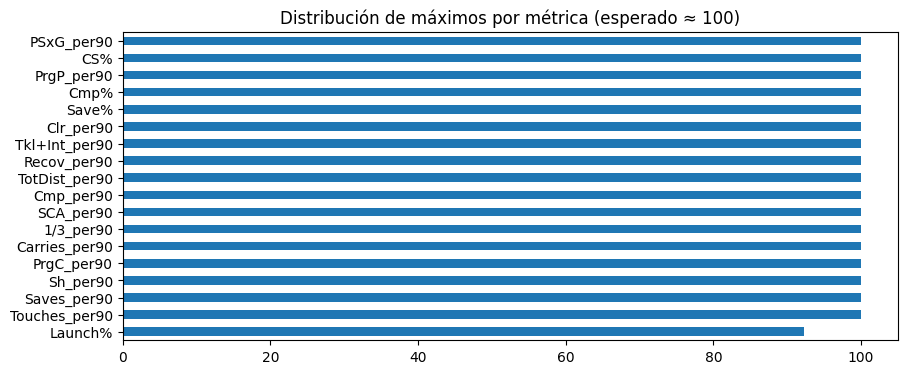

In [66]:
import matplotlib.pyplot as plt

cols_test = [c for c in df_final.select_dtypes(include="number").columns if c.endswith("_per90") or c.endswith("%")]

plt.figure(figsize=(10, 4))
df_final[cols_test].max().sort_values().plot(kind='barh')
plt.title("Distribución de máximos por métrica (esperado ≈ 100)")
plt.show()


In [67]:
# ============================================================
# 🏁 ETL FINAL — EXPORTACIÓN ACTUALIZADA PARA STREAMLIT (VERSIÓN FINAL)
# ============================================================

import pandas as pd
import numpy as np
import json
from datetime import datetime
from pathlib import Path

# --- 1️⃣ Filtrado final por minutos ---
def detectar_o_crear_minutos(df):
    candidatos = ["Min", "Minutes", "mins", "minutes", "Minutos"]
    col_min = next((c for c in candidatos if c in df.columns), None)
    df = df.copy()

    if col_min is None and "90s" in df.columns:
        df["Min"] = pd.to_numeric(df["90s"], errors="coerce") * 90
        col_min = "Min"
    elif col_min is None:
        raise ValueError("No se encontró columna de minutos (ni 'Min' ni '90s').")

    df[col_min] = pd.to_numeric(df[col_min], errors="coerce")
    return df, col_min


def filtrar_por_minutos(df, minimo=900):
    df, minutos_col = detectar_o_crear_minutos(df)
    df_filtrado = df[df[minutos_col] >= minimo].copy()
    return df_filtrado, minutos_col


df_filtrado, minutos_col = filtrar_por_minutos(df_final, minimo=900)
print(f"✅ Filtrado completado: {len(df_filtrado):,} jugadores ≥900 min")

# --- 2️⃣ Limpieza ligera antes de exportar ---
if "Age" in df_filtrado.columns:
    df_filtrado["Age"] = pd.to_numeric(df_filtrado["Age"].replace("N/A", np.nan), errors="coerce")
if "Born" in df_filtrado.columns:
    df_filtrado["Born"] = df_filtrado["Born"].astype(str).replace({"nan": "N/A", "NaN": "N/A"})

# --- 3️⃣ Directorio destino ---
destino = Path("data/processed")
destino.mkdir(parents=True, exist_ok=True)

fecha_hoy = datetime.now().strftime("%Y%m%d")
nombre_base = f"scouting_laliga_df_final_{fecha_hoy}"

# --- 4️⃣ Exportaciones principales ---
try:
    df_filtrado.to_parquet(destino / f"{nombre_base}.parquet", index=False, engine="pyarrow")
    print(f"✅ Dataset principal actualizado: {destino / f'{nombre_base}.parquet'}")
except Exception as e:
    print(f"⚠️ Error al guardar Parquet ({e}). Guardando CSV de respaldo.")
    df_filtrado.to_csv(destino / f"{nombre_base}.csv", index=False, encoding="utf-8-sig")

# Backup con fecha completa
backup_parquet = destino / f"{nombre_base}_backup.parquet"
df_filtrado.to_parquet(backup_parquet, index=False, engine="pyarrow")
print(f"📦 Copia de respaldo creada: {backup_parquet.name}")

# --- 5️⃣ Diccionario de datos ---
data_dict = pd.DataFrame([
    {"column": c, "dtype": str(df_filtrado[c].dtype)} for c in df_filtrado.columns
])
data_dict_path = destino / f"data_dictionary_{fecha_hoy}.csv"
data_dict.to_csv(data_dict_path, index=False, encoding="utf-8-sig")
print(f"📘 Diccionario actualizado: {data_dict_path.name}")

# --- 6️⃣ Metadatos ---
metadata = {
    "created_at": datetime.now().isoformat(timespec="seconds"),
    "rows": len(df_filtrado),
    "cols": len(df_filtrado.columns),
    "filters": {"minutes_min": 900},
    "scaling": "MinMax global (0–100, winsorized 1–99%)",
    "source": "ETL_scaling_pipeline.ipynb",
    "version": fecha_hoy,
}
metadata_path = destino / f"metadata_{fecha_hoy}.json"
with open(metadata_path, "w", encoding="utf-8") as f:
    json.dump(metadata, f, ensure_ascii=False, indent=2)

print("✅ Metadatos actualizados correctamente.")

# --- 7️⃣ Resumen final ---
print("\n--- EXPORTACIÓN COMPLETA ---")
print(f"📁 Archivo principal: {nombre_base}.parquet")
print(f"📁 Diccionario: {data_dict_path.name}")
print(f"📁 Metadatos: {metadata_path.name}")
print(f"📦 Copia de respaldo: {backup_parquet.name}")
print("----------------------------------------------")
print("🎯 Los datos ya están listos para Streamlit.")

# --- 8️⃣ Control rápido de rango (verificación final) ---
cols_num = df_filtrado.select_dtypes(include="number").columns
rangos = df_filtrado[cols_num].agg(["min", "max"]).T
rangos_out = rangos[(rangos["min"] < 0) | (rangos["max"] > 100)]
if rangos_out.empty:
    print("✅ Todas las métricas están dentro del rango esperado (0–100).")
else:
    print("⚠️ Columnas fuera de rango:")
    print(rangos_out)


✅ Filtrado completado: 1,589 jugadores ≥900 min
✅ Dataset principal actualizado: data\processed\scouting_laliga_df_final_20251030.parquet
📦 Copia de respaldo creada: scouting_laliga_df_final_20251030_backup.parquet
📘 Diccionario actualizado: data_dictionary_20251030.csv
✅ Metadatos actualizados correctamente.

--- EXPORTACIÓN COMPLETA ---
📁 Archivo principal: scouting_laliga_df_final_20251030.parquet
📁 Diccionario: data_dictionary_20251030.csv
📁 Metadatos: metadata_20251030.json
📦 Copia de respaldo: scouting_laliga_df_final_20251030_backup.parquet
----------------------------------------------
🎯 Los datos ya están listos para Streamlit.
⚠️ Columnas fuera de rango:
              min     max
Min         900.0  3420.0
PSxG_per90    0.0   100.0
